In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random

/home/alok/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
def read_graph(file_path):
    G = nx.Graph() 

    with open(file_path, 'r') as file:
        for line in file:
            node1, node2 = map(int, line.split()) 
            G.add_edge(node1, node2)

    return G

In [3]:
def display_graph(G):
    plt.figure(figsize=(10, 10)) 
    pos = nx.spring_layout(G, k=0.5, seed=42)
    nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=500, font_size=10) 
    plt.show()

In [4]:
def display_colored_graph(graph):
    node_colors = [graph.nodes[node].get('color', (0.5, 0.5, 0.5)) for node in graph.nodes] 
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(graph, k=0.5, seed=42)  
    nx.draw(graph, pos, with_labels=True, node_color=node_colors, edge_color='gray', node_size=500, font_size=10)
    plt.show()

In [10]:
def color_specific_nodes_red(graph, red_node_list):

    # Step 1: Make all nodes gray
    for node in graph.nodes:
        graph.nodes[node]['color'] = 'gray'

    # Step 2: Color the nodes in the red_node_names list as red
    for node_name in red_node_list:
        # Check if the node_name exists in the graph
        if node_name in graph.nodes:
            graph.nodes[node_name]['color'] = 'red'

    return graph

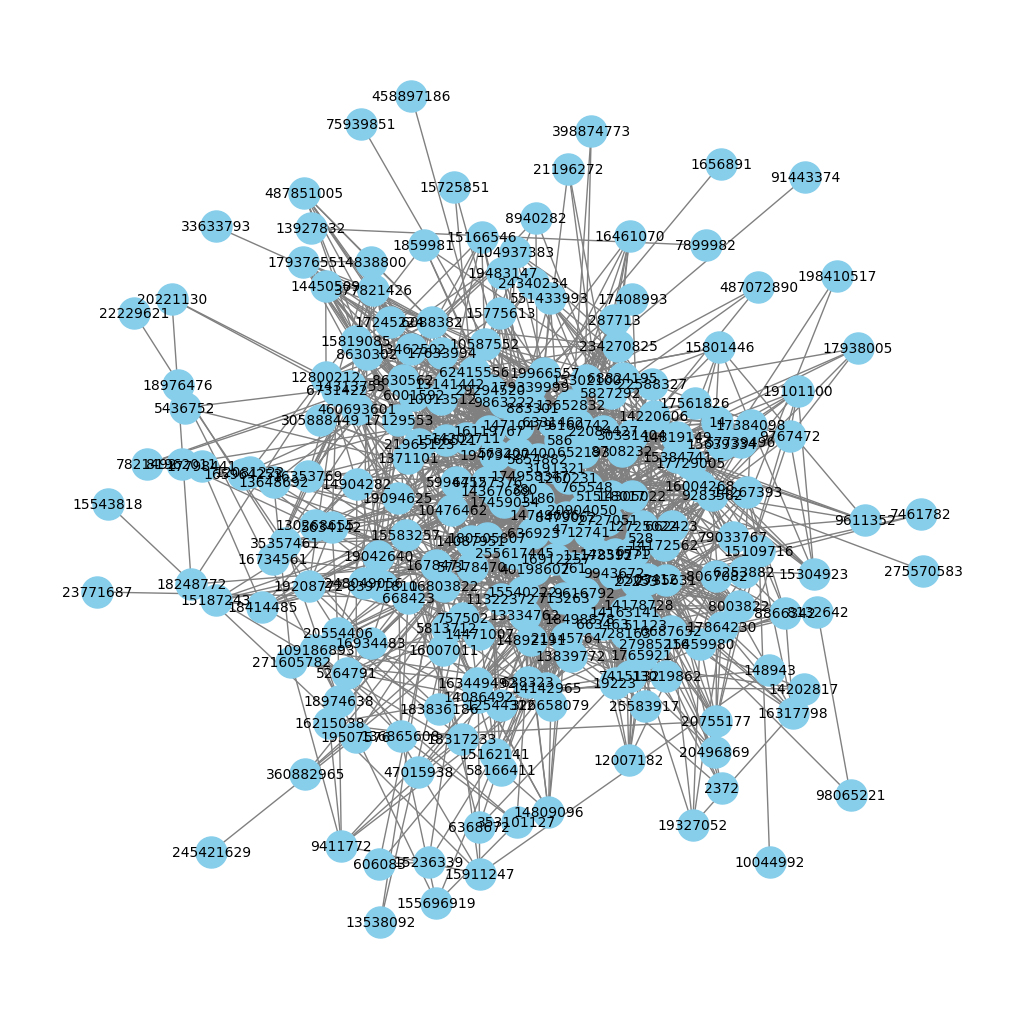

In [6]:
graph = read_graph("12831.edges")
display_graph(graph)

In [12]:
newgraph = color_specific_nodes_red(graph, [245421629, 13538092])

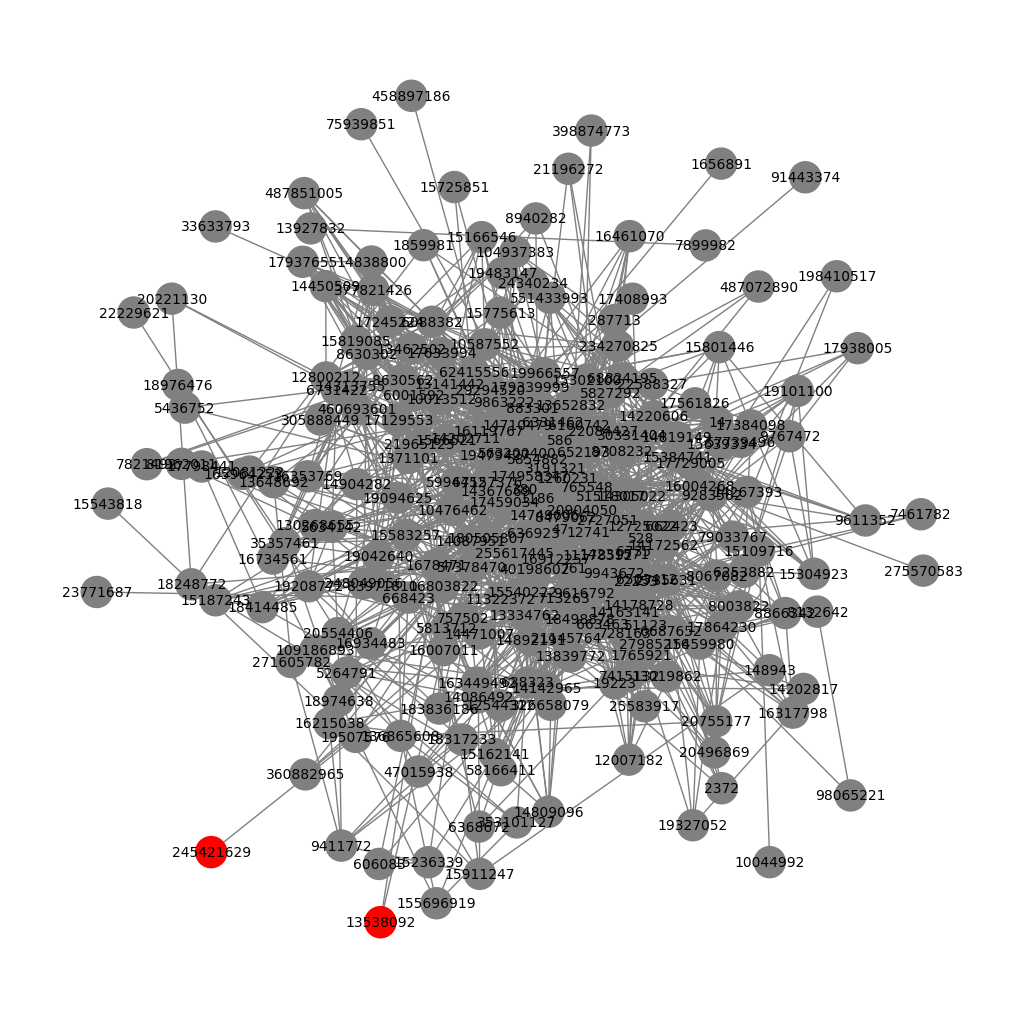

In [13]:
display_colored_graph(newgraph)

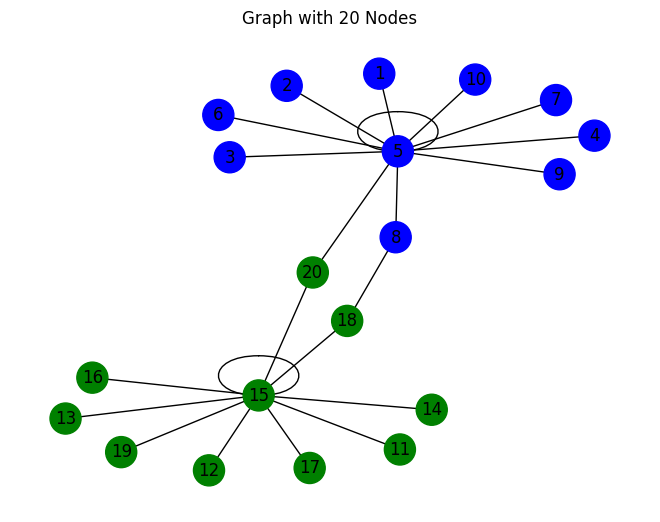

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Create a new graph
G = nx.Graph()

# Add nodes from 1 to 20
G.add_nodes_from(range(1, 21))

# Add edges according to the specified connections
G.add_edges_from([
    (5, i) for i in range(1, 11)  # Connect node 5 to nodes 1-10
])
G.add_edges_from([
    (15, i) for i in range(11, 21)  # Connect node 15 to nodes 11-20
])

# Connect two random nodes from the first 10 to two random nodes from the second 10
first_10_nodes = list(range(1, 11))
second_10_nodes = list(range(11, 21))

# Randomly choose 2 nodes from each group
selected_first = random.sample(first_10_nodes, 2)
selected_second = random.sample(second_10_nodes, 2)

# Create edges between the selected nodes
G.add_edges_from([(selected_first[0], selected_second[0]), (selected_first[1], selected_second[1])])

# Define node colors
color_map = ['blue' if node <= 10 else 'green' for node in G.nodes()]

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_color=color_map, node_size=500, font_size=12)

# Show the plot
plt.title("Graph with 20 Nodes")
plt.show()
